# Finding the Energy Levels of a Cubic Half-Potential  
In this notebook, we will use the integration tools developed in our test notebook to find the first four energy levels of a cubic half-potential.

We define the potential as the following:  
$ V(x) = \alpha x^3$, when $x > 0$  
$ V =$ infinity, when $ x < 0 $  
We will also set $\alpha = 5 \frac{eV}{angstrom^3}$

In [1]:
# import python modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

# plotting magic
%matplotlib notebook

# import integration scheme developed in other notebook
from QuantumSystem import QuantumSystem

## Step 1: Set up the system

We will set up our system as a child class of QuantumSystem, overwriting V(x) to fit the cubic potential

In [2]:
class CubicPotential(QuantumSystem):
    # overwrite __init__ so that we can give alpha as an arg
    def __init__(self, E, alpha, m=5.6856e-32):
        """
        Takes and stores constants needed to define the system.
        Inputs:
            E = particle energy (eV)
            alpha = coefficient to determine the strength
                of the potential (eV/angstrom^3)
            m = particle mass (ev/(angstrom/s)^2)
                default value is equal to 1 electron mass
        """
        self.E = E
        self.alpha = alpha
        self.m = m
        self.hbar = 6.5821e-16 # eV*s
    # overwrite V to define the cubic potential
    def V(self, x):
        """
        Function that returns the potential for a cubic well.
        Inputs:
            x = the position to evaluate the potential energy at (angstrom)
        Returns:
            the potential at position x (eV)
        """
        return self.alpha * x**3

## Step 2: Determining the first four energy levels

To do this, we will need to solve the wavefunction for a wide span of energies. We will know when we have found an energy level of the system when the solution converges to zero for a reasonable distance past the classical turning point ($x_{tp}$, defined as $E_{particle} = V(x_{tp})$).

In [3]:
# create an instance of our class
# start off with arbitrary energy
alpha = 5 # eV/angstrom^3
cubic = CubicPotential(1,alpha)

<IPython.core.display.Javascript object>


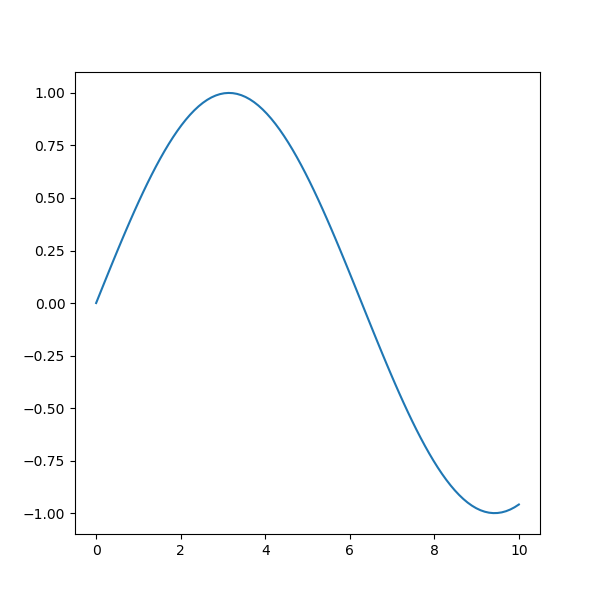

In [4]:
"""
Test Code for live-updating a plot
"""
fig, ax = plt.subplots(figsize=(6,6))

x = np.linspace(0,10,100)

line1 = ax.plot(x, np.sin(x))[0]

for phase in np.linspace(0,2*np.pi,20):
    line1.set_ydata(np.sin(0.5*x+phase))
    time.sleep(1)
    fig.canvas.draw()

<IPython.core.display.Javascript object>


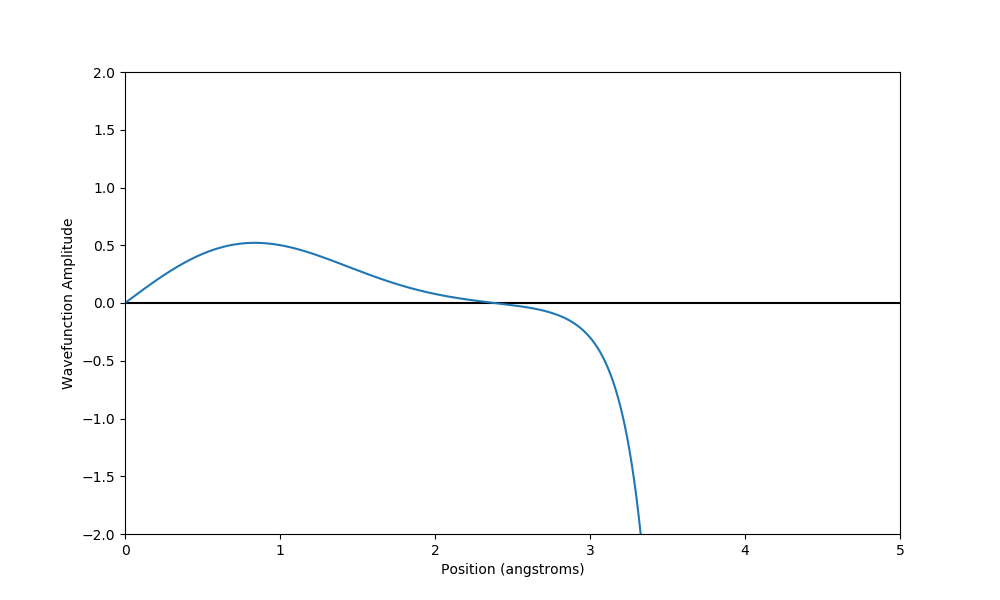

14.61


In [5]:
"""
Using a live plot, we will estimate the probable values of the energy levels
by looping through a wide range of values. After this, we will more precisely
determine the energies with static plots
"""
# range of energies to iterate through (eV)
E0 = 14.6
Emax = 14.7
deltaE = 0.01

"""
Integration parameters for each energy

Here we apply the boundary conditions for the half potential
Since V = inf for x < 0, the wavefunction must go to 0 at x=0.
The slope, for the unnormalized wavefunction, will have some arbitrary finite value at x=0
"""
x0 = 0
xmax = 5
dx = 0.005

psi0 = 0
psidot0 = 1

### plotting ###
# create the figure
fig, ax = plt.subplots(figsize=(10,6))

# set axis limits
# this will prevent our view from going haywire if the solution doesn't converge
ax.set_xlim(x0,xmax)
ax.set_ylim(-2,2)

# set axis labels
ax.set_xlabel('Position (angstroms)')
ax.set_ylabel('Wavefunction Amplitude')

# show x-axis
ax.axhline(y=0,color='k')

# plot wavefunction for initial energy
cubic.set_E(E0)
psi, x = cubic.Integrate(psi0, psidot0, x0, xmax, dx)
E_label = 'E = '+str(E0)+' eV'
line = ax.plot(x, psi, label=E_label, scalex=False, scaley=False)[0]

# show legend to display current energy
#ax.legend(loc='upper right')

# draw plot to live updated figure
fig.canvas.draw()

# iterate through the remaining energies
for i,E in enumerate(np.arange(E0+deltaE, Emax, deltaE)):
    # pause program to slow down updates
    time.sleep(0.5)
    
    # set new energy
    cubic.set_E(E)
    
    # integration
    psi, x = cubic.Integrate(psi0, psidot0, x0, xmax, dx)
    
    # update the plotted line
    line.set_ydata(psi)
    
    # draw updates to figure
    fig.canvas.draw()
    
    # print energy to the screen every so often
    if i % 10 == 0:
        print(E)


## Results

Using the above iterative process, we were able to shrink our energy intervals to hone in on the stationary states. Here we will plot our final approximate stationary states.

<IPython.core.display.Javascript object>


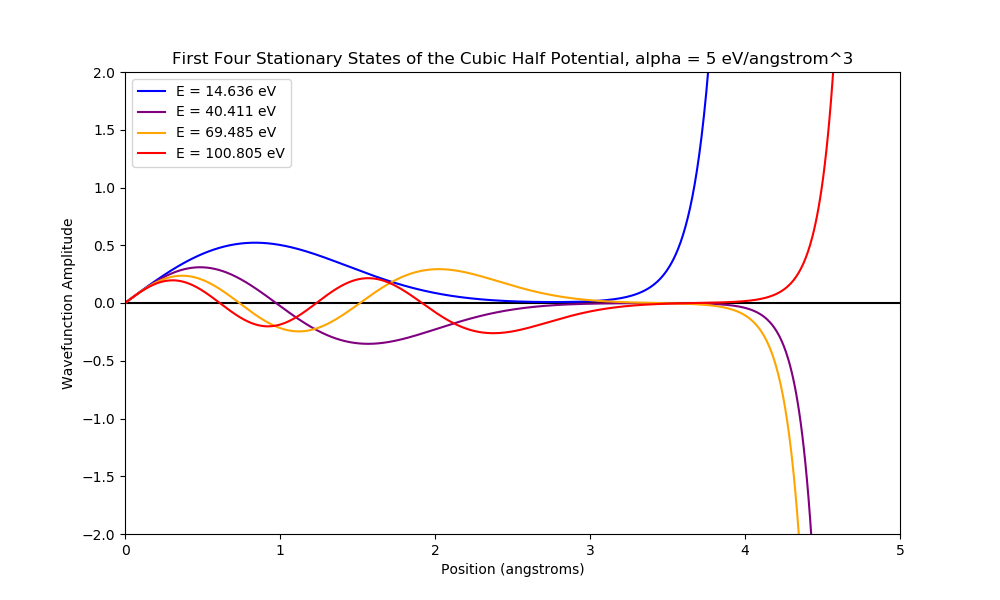

In [6]:
# approximate energy levels
E_levels = [14.636,40.411,69.485,100.805]

# create plot
fig, ax = plt.subplots(figsize=(10,6))

# set axis limits
ax.set_xlim(x0,xmax)
ax.set_ylim(-2,2)

# set axis labels
ax.set_title('First Four Stationary States of the Cubic Half Potential, alpha = 5 eV/angstrom^3')
ax.set_xlabel('Position (angstroms)')
ax.set_ylabel('Wavefunction Amplitude')

# show x-axis
ax.axhline(y=0,color='k')

# iterate through and plot the first 4 stationary states
colors = ['blue','purple','orange','red']
for i,E in enumerate(E_levels):
    cubic.set_E(E)
    psi,x = cubic.Integrate(psi0,psidot0,x0,xmax,dx)
    
    E_label = 'E = '+str(E)+' eV'
    
    ax.plot(x, psi, color=colors[i], label=E_label, scalex=False, scaley=False)

ax.legend()
fig.canvas.draw()